<a href="https://colab.research.google.com/github/Ebonica/CODING-RAJA-TECHNOLOGIES-DATA-SCIENCE-EBONICA-SALETH-/blob/main/DATA_SCIENCE_CODING_RAJA_TECHNOLOGIES(TASK2_EBONICA_SALETH).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv('fraudTrain.csv')

In [3]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7810,7810,2019-01-06 01:59:19,6524376634971418,fraud_Murray-Smitham,grocery_pos,132.27,Jasmine,Foster,F,954 White Alley Apt. 251,...,34.3470,-87.7154,5778.0,"Engineer, aeronautical",1952-12-05,e11d567d20b74f412c644122f57b7152,1.325815e+09,34.011938,-88.080823,0.0
7811,7811,2019-01-06 01:59:25,2348245054386329,fraud_Hackett-Lueilwitz,grocery_pos,83.51,Justin,Gay,M,268 Hayes Rue Suite 811,...,42.1767,-79.9416,2518.0,Event organiser,1946-02-02,dc5380f7b501f8fae23741ae9426ea87,1.325815e+09,41.328228,-79.226936,0.0
7812,7812,2019-01-06 02:00:33,2283743876903625,fraud_Koepp-Witting,grocery_pos,64.04,Shannon,Williams,F,9345 Spencer Junctions Suite 183,...,34.0770,-84.3033,165556.0,Prison officer,1997-12-27,eefe1322ac9155ed949e3c71b35ccc37,1.325815e+09,33.376781,-83.592263,0.0
7813,7813,2019-01-06 02:01:43,213195754007681,"fraud_Robel, Cummerata and Prosacco",gas_transport,66.86,Zachary,Allen,M,69252 Oconnor Alley Apt. 153,...,41.2001,-92.1354,568.0,Commercial horticulturist,1969-07-24,bb4b4d3d673dddf931fc71c12e090b1d,1.325815e+09,40.955293,-92.395676,0.0


**DATA ANALYSIS**

In [8]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [9]:
df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
7810,7810,2019-01-06 01:59:19,6524376634971418,fraud_Murray-Smitham,grocery_pos,132.27,Jasmine,Foster,F,954 White Alley Apt. 251,...,34.3470,-87.7154,5778.0,"Engineer, aeronautical",1952-12-05,e11d567d20b74f412c644122f57b7152,1.325815e+09,34.011938,-88.080823,0.0
7811,7811,2019-01-06 01:59:25,2348245054386329,fraud_Hackett-Lueilwitz,grocery_pos,83.51,Justin,Gay,M,268 Hayes Rue Suite 811,...,42.1767,-79.9416,2518.0,Event organiser,1946-02-02,dc5380f7b501f8fae23741ae9426ea87,1.325815e+09,41.328228,-79.226936,0.0
7812,7812,2019-01-06 02:00:33,2283743876903625,fraud_Koepp-Witting,grocery_pos,64.04,Shannon,Williams,F,9345 Spencer Junctions Suite 183,...,34.0770,-84.3033,165556.0,Prison officer,1997-12-27,eefe1322ac9155ed949e3c71b35ccc37,1.325815e+09,33.376781,-83.592263,0.0
7813,7813,2019-01-06 02:01:43,213195754007681,"fraud_Robel, Cummerata and Prosacco",gas_transport,66.86,Zachary,Allen,M,69252 Oconnor Alley Apt. 153,...,41.2001,-92.1354,568.0,Commercial horticulturist,1969-07-24,bb4b4d3d673dddf931fc71c12e090b1d,1.325815e+09,40.955293,-92.395676,0.0
7814,7814,2019-01-06 02:02:05,30343344410970,fraud_Morissette LLC,entertainment,64.98,Jacob,Dawso,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.to_csv("updated_dataset.csv", index=False)

In [11]:
nan_rows = df[df.isna().any(axis=1)]

# Optional: Print the rows containing NaN values
print("Rows containing NaN values:")
print(nan_rows)

# Remove rows containing NaN values
df.dropna(inplace=True)

# Save the updated DataFrame back to a new CSV file or use it for further analysis
df.to_csv("updated_dataset.csv", index= True)

Rows containing NaN values:
     trans_date_trans_time          cc_num              merchant  \
7814   2019-01-06 02:02:05  30343344410970  fraud_Morissette LLC   

           category    amt  first   last gender street city  ... lat  long  \
7814  entertainment  64.98  Jacob  Dawso    NaN    NaN  NaN  ... NaN   NaN   

      city_pop  job  dob trans_num unix_time merch_lat  merch_long  is_fraud  
7814       NaN  NaN  NaN       NaN       NaN       NaN         NaN       NaN  

[1 rows x 22 columns]


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7814 entries, 0 to 7813
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  7814 non-null   object 
 1   cc_num                 7814 non-null   int64  
 2   merchant               7814 non-null   object 
 3   category               7814 non-null   object 
 4   amt                    7814 non-null   float64
 5   first                  7814 non-null   object 
 6   last                   7814 non-null   object 
 7   gender                 7814 non-null   object 
 8   street                 7814 non-null   object 
 9   city                   7814 non-null   object 
 10  state                  7814 non-null   object 
 11  zip                    7814 non-null   float64
 12  lat                    7814 non-null   float64
 13  long                   7814 non-null   float64
 14  city_pop               7814 non-null   float64
 15  job 

In [13]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,7.814000e+03,7814.000000,7814.000000,7814.000000,7814.000000,7.814000e+03,7.814000e+03,7814.000000,7814.000000,7814.000000
mean,4.078639e+17,68.661834,49479.396340,38.595821,-90.688408,8.823451e+04,1.325583e+09,38.599153,-90.685832,0.005759
std,1.295143e+18,115.537412,27184.827244,5.198199,14.512405,2.944470e+05,1.359720e+05,5.226026,14.532152,0.075673
min,6.041621e+10,1.010000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.165823,-166.550779,0.000000
25%,1.800216e+14,9.782500,26041.000000,34.852700,-97.235100,7.410000e+02,1.325448e+09,34.913072,-97.322865,0.000000
50%,3.518759e+15,48.465000,49259.000000,39.376400,-87.764400,2.395000e+03,1.325583e+09,39.392224,-87.772889,0.000000
75%,4.653879e+15,82.220000,72476.000000,41.846700,-80.143075,1.905400e+04,1.325704e+09,41.923981,-80.187209,0.000000
max,4.992346e+18,3178.510000,99783.000000,65.689900,-67.950300,2.906700e+06,1.325815e+09,66.645176,-66.967742,1.000000


In [14]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [15]:
df.shape

(7814, 22)

In [16]:
df.dtypes

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                      float64
lat                      float64
long                     float64
city_pop                 float64
job                       object
dob                       object
trans_num                 object
unix_time                float64
merch_lat                float64
merch_long               float64
is_fraud                 float64
dtype: object

In [17]:
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [18]:
df.iloc[8]

trans_date_trans_time                 2019-01-01 00:05:18
cc_num                                   4922710831011201
merchant                                 fraud_Herzog Ltd
category                                         misc_pos
amt                                                  4.27
first                                             Heather
last                                                Chase
gender                                                  F
street                        6888 Hicks Stream Suite 954
city                                                Manor
state                                                  PA
zip                                               15665.0
lat                                               40.3359
long                                             -79.6607
city_pop                                           1472.0
job                             Public affairs consultant
dob                                            1941-03-07
trans_num     

In [19]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [20]:
df.tail()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
7809,2019-01-06 01:59:09,3558881852140592,fraud_Bernhard Inc,gas_transport,41.28,Christopher,Holt,M,05597 Michael Spurs,Parks,...,35.2563,-111.9500,759.0,"Geologist, engineering",1957-03-28,ce34f77817f8e6abe543d65aa488bbe0,1.325815e+09,34.964059,-111.203646,0.0
7810,2019-01-06 01:59:19,6524376634971418,fraud_Murray-Smitham,grocery_pos,132.27,Jasmine,Foster,F,954 White Alley Apt. 251,Phil Campbell,...,34.3470,-87.7154,5778.0,"Engineer, aeronautical",1952-12-05,e11d567d20b74f412c644122f57b7152,1.325815e+09,34.011938,-88.080823,0.0
7811,2019-01-06 01:59:25,2348245054386329,fraud_Hackett-Lueilwitz,grocery_pos,83.51,Justin,Gay,M,268 Hayes Rue Suite 811,Harborcreek,...,42.1767,-79.9416,2518.0,Event organiser,1946-02-02,dc5380f7b501f8fae23741ae9426ea87,1.325815e+09,41.328228,-79.226936,0.0
7812,2019-01-06 02:00:33,2283743876903625,fraud_Koepp-Witting,grocery_pos,64.04,Shannon,Williams,F,9345 Spencer Junctions Suite 183,Alpharetta,...,34.0770,-84.3033,165556.0,Prison officer,1997-12-27,eefe1322ac9155ed949e3c71b35ccc37,1.325815e+09,33.376781,-83.592263,0.0
7813,2019-01-06 02:01:43,213195754007681,"fraud_Robel, Cummerata and Prosacco",gas_transport,66.86,Zachary,Allen,M,69252 Oconnor Alley Apt. 153,Ollie,...,41.2001,-92.1354,568.0,Commercial horticulturist,1969-07-24,bb4b4d3d673dddf931fc71c12e090b1d,1.325815e+09,40.955293,-92.395676,0.0


In [21]:
df.dtypes

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                      float64
lat                      float64
long                     float64
city_pop                 float64
job                       object
dob                       object
trans_num                 object
unix_time                float64
merch_lat                float64
merch_long               float64
is_fraud                 float64
dtype: object

In [22]:
print(df.amt.nunique())
print(df.amt.unique())
print(df.amt.value_counts())

5581
[  4.97 107.23 220.11 ... 132.27  64.04  66.86]
2.81      8
1.16      8
1.42      7
1.13      7
7.98      7
         ..
97.34     1
118.66    1
68.21     1
111.47    1
66.86     1
Name: amt, Length: 5581, dtype: int64


In [23]:
print(df.city.nunique())
print(df.city.unique())
print(df.city.value_counts())

827
['Moravian Falls' 'Orient' 'Malad City' 'Boulder' 'Doe Hill' 'Dublin'
 'Holcomb' 'Edinburg' 'Manor' 'Clarksville' 'Clarinda'
 'Shenandoah Junction' 'Saint Petersburg' 'Grenada'
 'High Rolls Mountain Park' 'Harrington Park' 'Lahoma' 'Carlisle'
 'Harborcreek' 'Elizabeth' 'Methuen' 'Moulton' 'Plainfield' 'May'
 'Waukesha' 'Bailey' 'Romulus' 'Freedom' 'Honokaa' 'Valentine' 'Westfir'
 'Tiptonville' 'Republic' 'Baton Rouge' 'Washington' 'Big Creek'
 'Bellmore' 'Florence' 'Allentown' 'Moriches' 'Esbon' 'Chatham' 'Thompson'
 'North Prairie' 'Laredo' 'Grant' 'Conway' 'New Goshen' 'Sunflower'
 'Enola' 'Roosevelt' 'Pointe Aux Pins' 'Dallas' 'Jay' 'North Tonawanda'
 'Athena' 'Chester' 'Elkhart' 'Surrency' 'Arcadia' 'Gaithersburg'
 'Bowdoin' 'Heart Butte' 'San Jose' 'Rumely' 'Cranks' 'Ravenna' 'Utica'
 'Uledi' 'Naples' 'Thida' 'Parks' 'Central' 'Fort Washakie' 'Etlan'
 'Brinson' 'Shrewsbury' 'Bigelow' 'North Washington' 'Holloway'
 'Littleton' 'Hinesburg' 'Meadville' 'Elberta' 'Moab' 'Diamond' 

In [24]:
print(df.job.nunique())
print(df.job.unique())
print(df.job.value_counts())

473
['Psychologist, counselling' 'Special educational needs teacher'
 'Nature conservation officer' 'Patent attorney'
 'Dance movement psychotherapist' 'Transport planner' 'Arboriculturist'
 'Designer, multimedia' 'Public affairs consultant' 'Pathologist'
 'IT trainer' 'Systems developer' 'Engineer, land' 'Systems analyst'
 'Naval architect' 'Radiographer, diagnostic'
 'Programme researcher, broadcasting/film/video' 'Energy engineer'
 'Event organiser' 'Operational researcher' 'Market researcher'
 'Probation officer' 'Leisure centre manager'
 'Corporate investment banker' 'Therapist, occupational'
 'Call centre manager' 'Police officer' 'Education officer, museum'
 'Physiotherapist' 'Network engineer' 'Forensic psychologist' 'Geochemist'
 'Armed forces training and education officer' 'Designer, furniture'
 'Optician, dispensing' 'Psychologist, forensic' 'Librarian, public'
 'Fine artist' 'Scientist, research (maths)'
 'Research officer, trade union' 'Tourism officer'
 'Human resources 

In [25]:
print(df.is_fraud.nunique())
print(df.is_fraud.unique())
print(df.is_fraud.value_counts())

2
[0. 1.]
0.0    7769
1.0      45
Name: is_fraud, dtype: int64


In [26]:
print(df.category.nunique())
print(df.category.unique())
print(df.category.value_counts())

14
['misc_net' 'grocery_pos' 'entertainment' 'gas_transport' 'misc_pos'
 'grocery_net' 'shopping_net' 'shopping_pos' 'food_dining' 'personal_care'
 'health_fitness' 'travel' 'kids_pets' 'home']
gas_transport     819
grocery_pos       787
home              778
kids_pets         675
shopping_pos      663
shopping_net      573
personal_care     557
entertainment     543
food_dining       543
health_fitness    505
misc_pos          446
misc_net          414
grocery_net       285
travel            226
Name: category, dtype: int64


In [27]:
print(df.merchant.nunique())
print(df.merchant.unique())
print(df.merchant.value_counts())

693
['fraud_Rippin, Kub and Mann' 'fraud_Heller, Gutmann and Zieme'
 'fraud_Lind-Buckridge' 'fraud_Kutch, Hermiston and Farrell'
 'fraud_Keeling-Crist' 'fraud_Stroman, Hudson and Erdman'
 'fraud_Rowe-Vandervort' 'fraud_Corwin-Collins' 'fraud_Herzog Ltd'
 'fraud_Schoen, Kuphal and Nitzsche' 'fraud_Rutherford-Mertz'
 'fraud_Kerluke-Abshire' 'fraud_Lockman Ltd' 'fraud_Kiehn Inc'
 'fraud_Beier-Hyatt' 'fraud_Schmidt and Sons' 'fraud_Lebsack and Sons'
 'fraud_Mayert Group' 'fraud_Konopelski, Schneider and Hartmann'
 'fraud_Schultz, Simonis and Little' 'fraud_Bauch-Raynor'
 'fraud_Harris Inc' 'fraud_Kling-Grant' 'fraud_Pacocha-Bauch'
 'fraud_Lesch Ltd' 'fraud_Kunde-Sanford' "fraud_Deckow-O'Conner"
 'fraud_Bruen-Yost' 'fraud_Kunze Inc' 'fraud_Nitzsche, Kessler and Wolff'
 'fraud_Kihn, Abernathy and Douglas' 'fraud_Torphy-Goyette'
 'fraud_Balistreri-Nader' 'fraud_Bahringer, Schoen and Corkery'
 'fraud_Hudson-Ratke' 'fraud_Heidenreich PLC' 'fraud_Halvorson Group'
 'fraud_Harber Inc' 'fraud_Mosci

In [28]:
print(df.street.nunique())
print(df.street.unique())
print(df.street.value_counts())

897
['561 Perry Cove' '43039 Riley Greens Suite 393'
 '594 White Dale Suite 530' '9443 Cynthia Court Apt. 038'
 '408 Bradley Rest' '4655 David Island' '889 Sarah Station Suite 624'
 '231 Flores Pass Suite 720' '6888 Hicks Stream Suite 954'
 '21326 Taylor Squares Suite 708' '1831 Faith View Suite 653'
 '43576 Kristina Islands' '3337 Lisa Divide' '5916 Susan Bridge Apt. 939'
 '1632 Cohen Drive Suite 639' '870 Rocha Drive'
 '44259 Beth Station Suite 215' '4923 Campbell Pines Suite 717'
 '268 Hayes Rue Suite 811' '269 Sanchez Rapids' '4005 Dana Glens'
 '21447 Powell Circle' '2481 Mills Lock' '759 Erin Mount Suite 956'
 '7683 Natasha Way Apt. 945' '551 Zachary Freeway' '61390 Hayes Port'
 '7483 Navarro Flats' '2711 Duran Pines' '969 Huerta Path Apt. 270'
 '57887 Gutierrez Harbor' '39787 Pamela Fall Suite 639'
 '445 Jerry Lights Apt. 081' '50872 Alex Plain Suite 088'
 '20937 Reed Lakes Apt. 271' '61107 Edwards Dam Apt. 463'
 '9333 Valentine Point' '742 Oneill Shore' '41851 Victor Drives Suit

In [29]:
print(df.trans_num.nunique())
print(df.trans_num.unique())
print(df.trans_num.value_counts())

7814
['0b242abb623afc578575680df30655b9' '1f76529f8574734946361c461b024d99'
 'a1a22d70485983eac12b5b88dad1cf95' ... 'dc5380f7b501f8fae23741ae9426ea87'
 'eefe1322ac9155ed949e3c71b35ccc37' 'bb4b4d3d673dddf931fc71c12e090b1d']
0b242abb623afc578575680df30655b9    1
671cc21f7bce35018e4590558ef72748    1
2e9e29782ee873b1d080a5961c44ce6f    1
44317c6e245a40cd9b75fca8d91c4031    1
7d7aa92d2913f5f6ffaeb08981d39a44    1
                                   ..
c1b4a493c3c668701c351871f73ed0b9    1
776ee8a6aad225caae9c7f1568c7765d    1
636fe161c3bd0f8c0cbef0f412f9ccf3    1
d662f8a9ad9585630538204438e35cb5    1
bb4b4d3d673dddf931fc71c12e090b1d    1
Name: trans_num, Length: 7814, dtype: int64


In [30]:
print(df.gender.nunique())
print(df.gender.unique())
print(df.gender.value_counts())

2
['F' 'M']
F    4299
M    3515
Name: gender, dtype: int64


In [31]:
print(df.city_pop.nunique())
print(df.city_pop.unique())
print(df.city_pop.value_counts())

813
[3.495000e+03 1.490000e+02 4.154000e+03 1.939000e+03 9.900000e+01
 2.158000e+03 2.691000e+03 6.018000e+03 1.472000e+03 1.517850e+05
 7.297000e+03 1.925000e+03 3.410430e+05 5.890000e+02 8.990000e+02
 4.664000e+03 1.078000e+03 4.081000e+03 2.518000e+03 1.249670e+05
 4.724900e+04 1.132000e+03 7.148500e+04 1.791000e+03 9.501500e+04
 6.629000e+03 3.151500e+04 4.710000e+02 4.878000e+03 4.005000e+03
 5.970000e+02 5.577000e+03 1.038000e+03 3.789090e+05 6.017230e+05
 4.670000e+02 3.449600e+04 1.968500e+04 1.660810e+05 3.285000e+03
 2.420000e+02 4.015000e+03 4.600000e+01 2.328000e+03 2.488580e+05
 5.901000e+03 8.500000e+01 2.050000e+02 1.686000e+03 9.690000e+02
 5.510000e+02 9.500000e+01 1.263321e+06 5.719000e+03 4.510000e+04
 1.302000e+03 5.848000e+03 1.195000e+03 1.324000e+03 6.800000e+02
 1.353320e+05 3.224000e+03 7.430000e+02 9.738490e+05 1.370000e+02
 5.810000e+02 2.202000e+03 2.690000e+02 3.280000e+02 2.760020e+05
 1.110000e+02 7.590000e+02 3.500000e+02 1.645000e+03 3.950000e+02
 1.461

**PREPROCESSING THE DATASET**

In [32]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
normalized_data=df.apply(LabelEncoder().fit_transform)
normalized_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,409,514,8,353,150,17,0,518,489,...,263,635,446,354,709,349,0,2356,5278,0
1,1,36,241,4,4441,289,152,0,402,563,...,881,54,41,409,539,924,1,7755,521,0
2,2,218,390,0,5296,104,366,1,551,436,...,670,77,469,293,259,4892,2,6535,779,0
3,3,467,360,2,2132,151,441,1,848,81,...,852,80,360,314,337,3234,3,7552,755,0
4,4,340,297,9,2012,315,144,1,387,202,...,357,689,21,110,665,4976,4,3410,6277,0


In [33]:
normalized_data.dtypes

trans_date_trans_time    int64
cc_num                   int64
merchant                 int64
category                 int64
amt                      int64
first                    int64
last                     int64
gender                   int64
street                   int64
city                     int64
state                    int64
zip                      int64
lat                      int64
long                     int64
city_pop                 int64
job                      int64
dob                      int64
trans_num                int64
unix_time                int64
merch_lat                int64
merch_long               int64
is_fraud                 int64
dtype: object

**DATA VISUALIZATION**

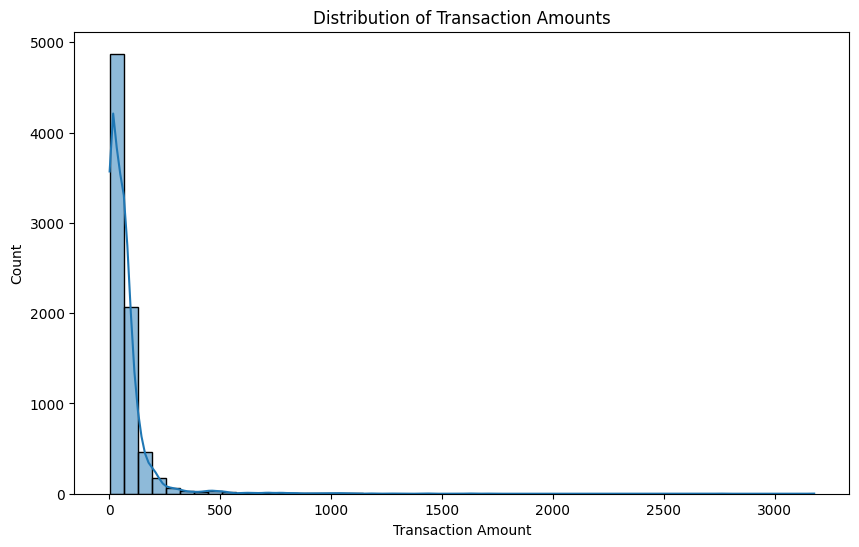

In [34]:
# 1. Distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['amt'], bins=50, kde=True)
plt.xlabel("Transaction Amount")
plt.ylabel("Count")
plt.title("Distribution of Transaction Amounts")
plt.show()

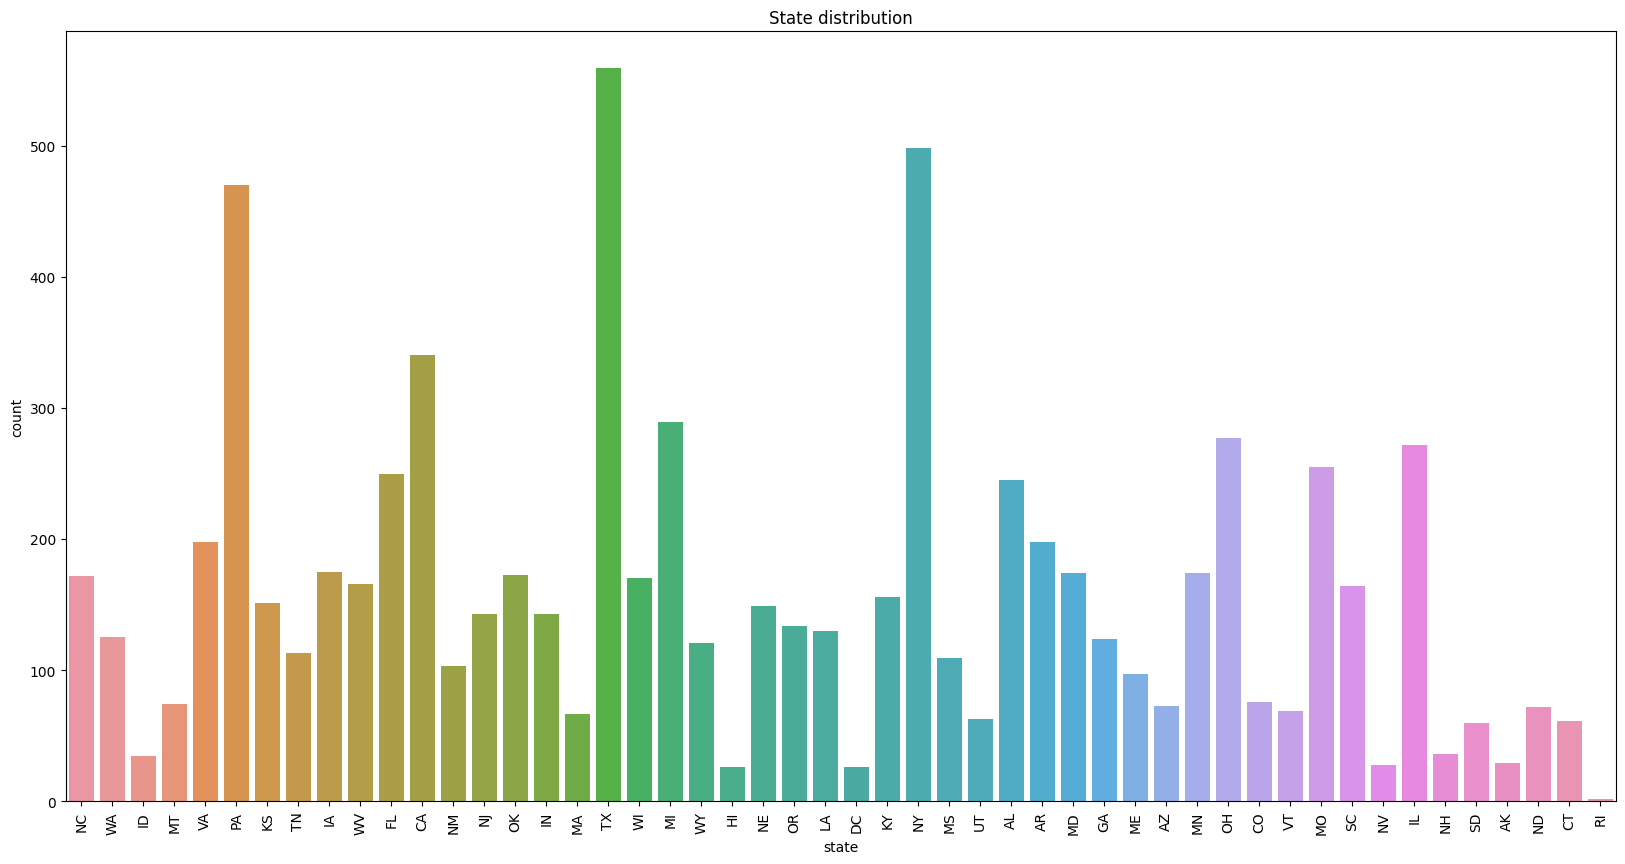

In [35]:
# 2. Bar plot for state
plt.figure(figsize=(20, 10))
sns.countplot(x='state', data=df)
plt.title('State distribution')
plt.xticks(rotation=90)
plt.show()

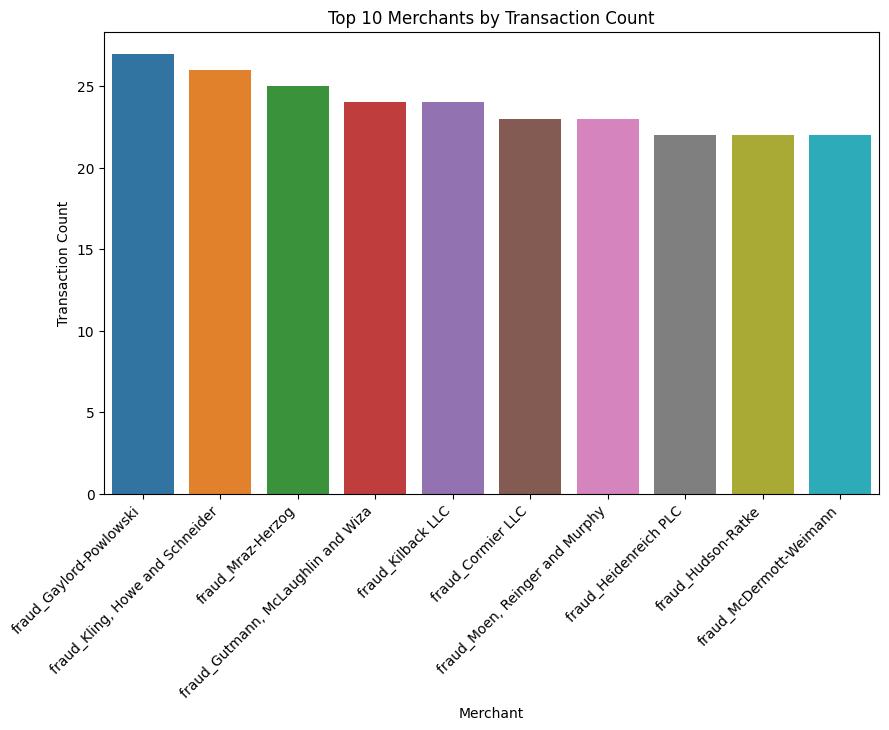

In [36]:
# 3. Top merchants based on transaction counts
top_merchants = df['merchant'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_merchants.index, y=top_merchants.values)
plt.xlabel("Merchant")
plt.ylabel("Transaction Count")
plt.title("Top 10 Merchants by Transaction Count")
plt.xticks(rotation=45, ha='right')
plt.show()

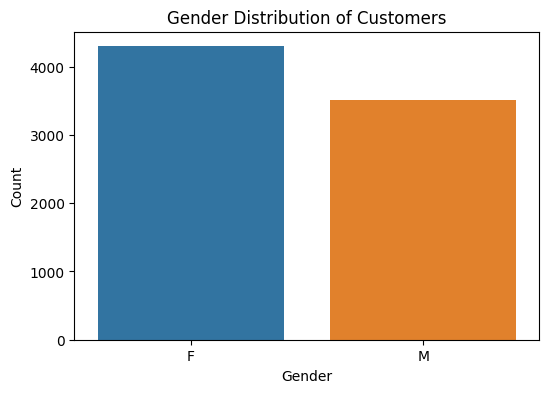

In [37]:
# 4. Gender distribution of customers
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution of Customers")
plt.show()


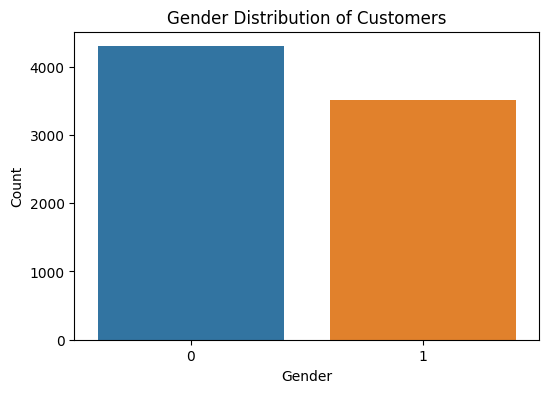

In [38]:
# 5. Count plot for gender vs count
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=normalized_data)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution of Customers")
plt.show()


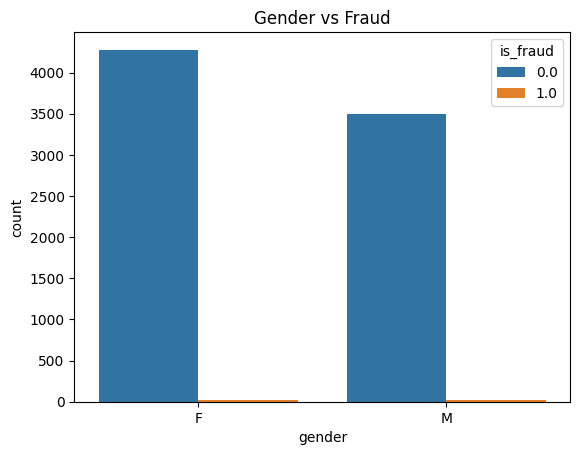

In [39]:
# 6. Count plot for gender vs fraud
sns.countplot(x='gender', hue='is_fraud', data=df)
plt.title("Gender vs Fraud")
plt.show()


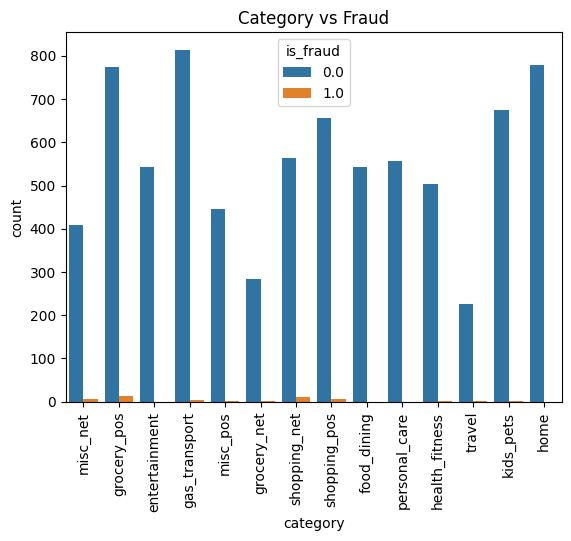

In [40]:
# 7. Count plot for category
sns.countplot(x='category', hue='is_fraud', data=df)
plt.title("Category vs Fraud")
plt.xticks(rotation=90)
plt.show()

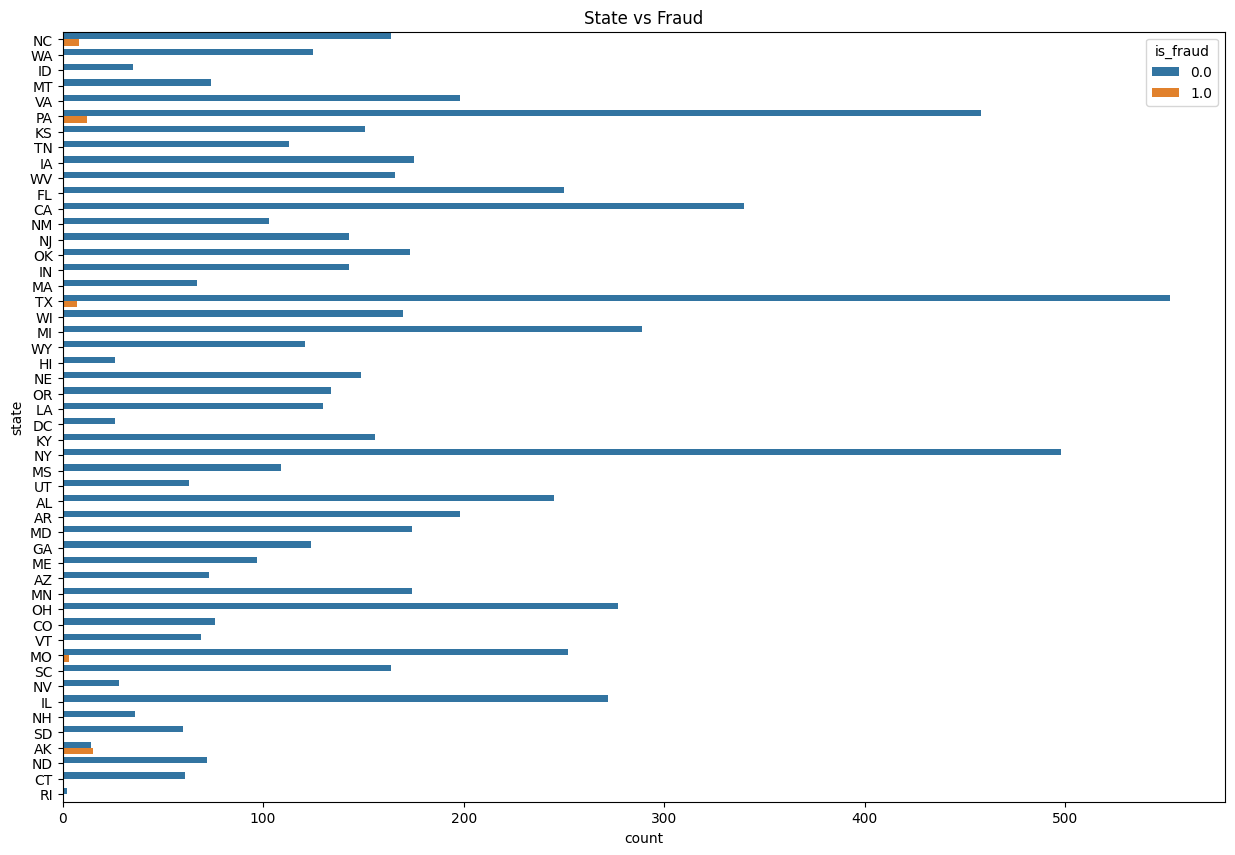

In [41]:
# 8. State vs Fraud
plt.figure(figsize=(15,10))
sns.countplot(y='state', hue='is_fraud', data=df)
plt.title("State vs Fraud")
plt.show()

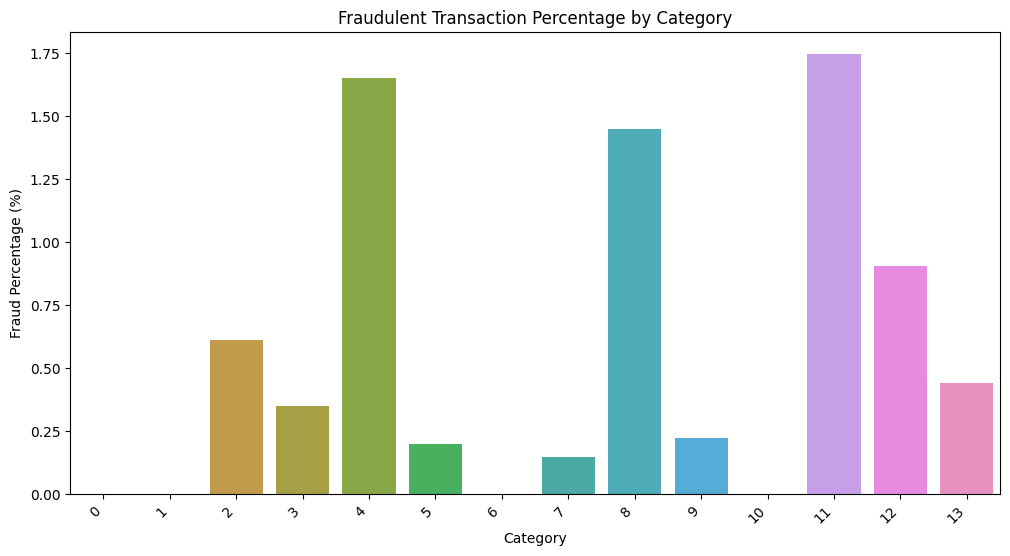

In [42]:
# 9. Fraudulent transaction percentage by category
fraud_percentage_by_category = normalized_data.groupby('category')['is_fraud'].mean() * 100
plt.figure(figsize=(12, 6))
sns.barplot(x=fraud_percentage_by_category.index, y=fraud_percentage_by_category.values)
plt.xlabel("Category")
plt.ylabel("Fraud Percentage (%)")
plt.title("Fraudulent Transaction Percentage by Category")
plt.xticks(rotation=45, ha='right')
plt.show()


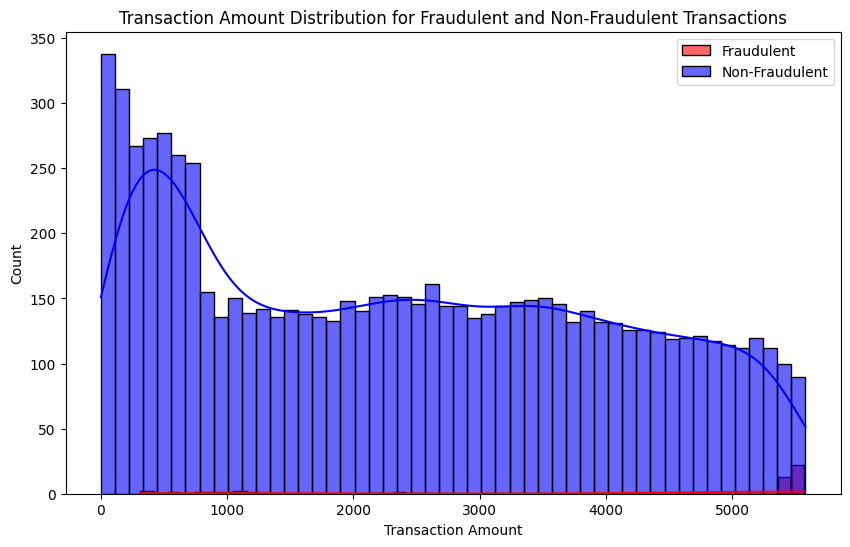

In [43]:
# 10. Transaction amount distribution for fraudulent and non-fraudulent transactions
plt.figure(figsize=(10, 6))
sns.histplot(normalized_data[normalized_data['is_fraud'] == 1]['amt'], bins=50, kde=True, label='Fraudulent', color='red', alpha=0.6)
sns.histplot(normalized_data[normalized_data['is_fraud'] == 0]['amt'], bins=50, kde=True, label='Non-Fraudulent', color='blue', alpha=0.6)
plt.xlabel("Transaction Amount")
plt.ylabel("Count")
plt.title("Transaction Amount Distribution for Fraudulent and Non-Fraudulent Transactions")
plt.legend()
plt.show()

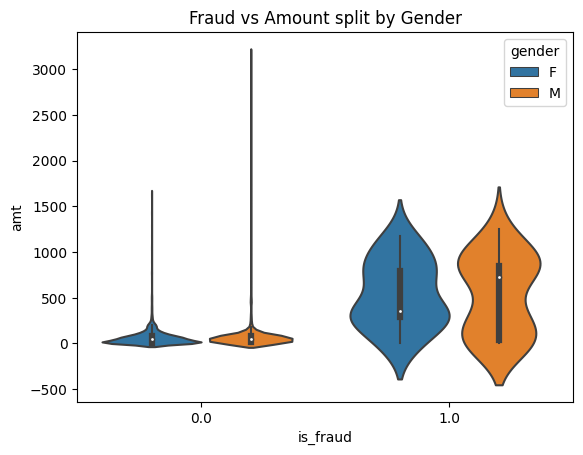

In [44]:
# 11. Violinplot of Amount against fraud classfication split by gender.
sns.violinplot(x='is_fraud', y='amt', hue='gender', data=df)
plt.title('Fraud vs Amount split by Gender')
plt.show()

,count,distribution
legit,7769,99.424111
fraud,45,0.575889


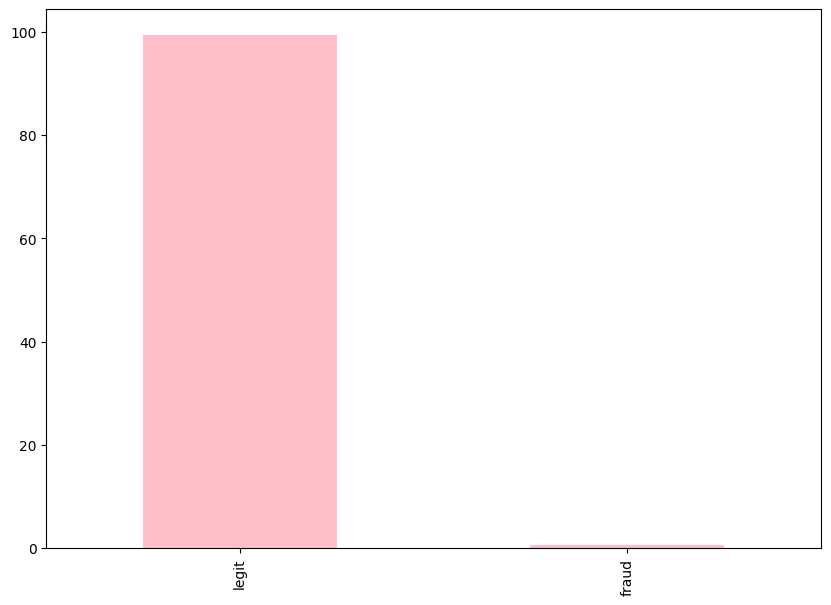

In [45]:
a = df['is_fraud'].value_counts().rename('count') # count of classes
b = (df['is_fraud'].value_counts(normalize = True)*100).rename('distribution') # normalisation of the classes
tem = pd.concat([a,b], axis = 1)
tem.index = ['legit','fraud']
tem['distribution'].plot(kind = 'bar', figsize = [10,7],color='pink');
tem

In [46]:
a

0.0    7769
1.0      45
Name: count, dtype: int64

In [47]:
b

0.0    99.424111
1.0     0.575889
Name: distribution, dtype: float64

In [49]:
fraud = df[df['is_fraud']==1]
legit = df[df['is_fraud']==0]

In [50]:
fraud.shape

(45, 22)

In [51]:
legit.shape

(7769, 22)

In [52]:
fraud.amt.describe()

count      45.000000
mean      533.837333
std       394.672077
min         4.500000
25%       275.730000
50%       367.290000
75%       844.800000
max      1254.270000
Name: amt, dtype: float64

In [53]:
legit.amt.describe()

count    7769.000000
mean       65.967421
std       106.222062
min         1.010000
25%         9.720000
50%        48.280000
75%        81.720000
max      3178.510000
Name: amt, dtype: float64

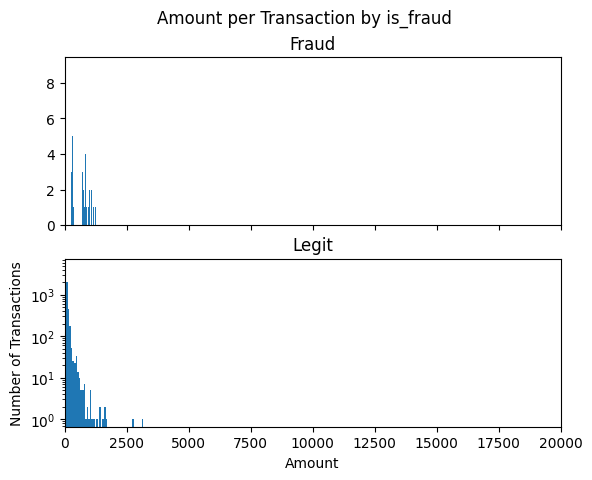

In [54]:
df, (a1, a2) = plt.subplots(2, 1, sharex=True)
df.suptitle('Amount per Transaction by is_fraud')
bins = 50
a1.hist(fraud.amt,bins = bins)
a1.set_title('Fraud')
a2.hist(legit.amt,bins = bins)
a2.set_title('Legit')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

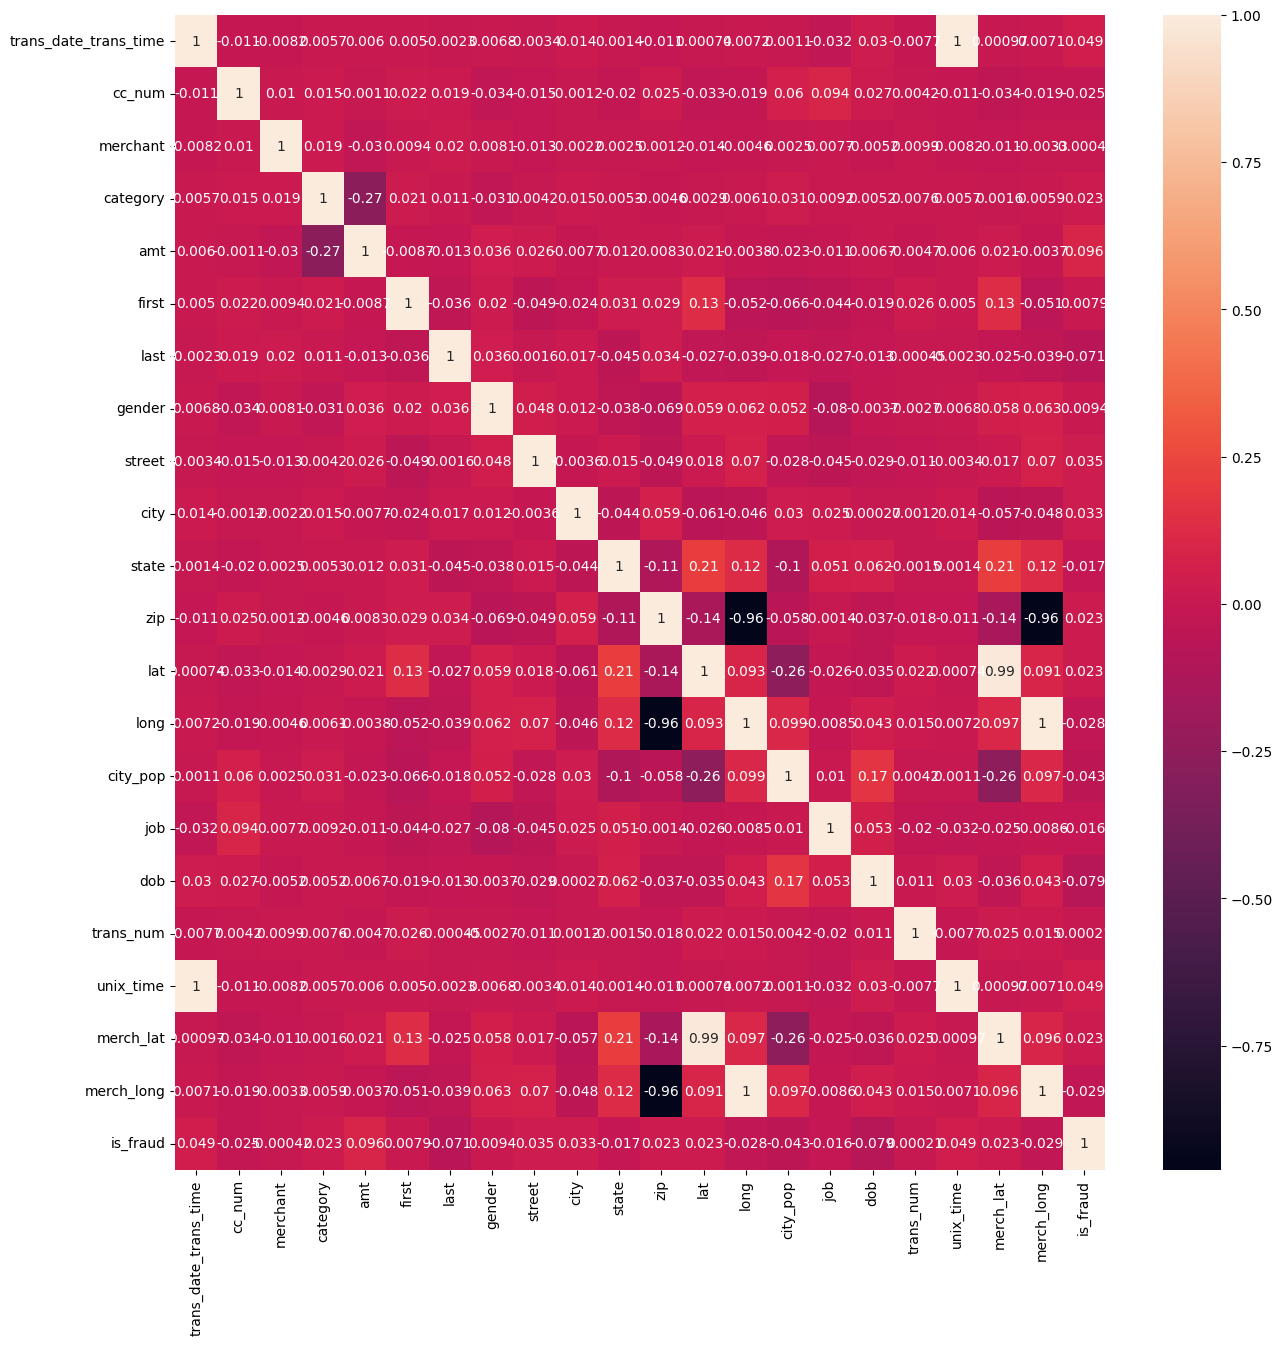

In [55]:
#Correleation matrix
corrmat = normalized_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
graph = sns.heatmap(normalized_data[top_corr_features].corr(),annot=True)

In [56]:
outlier_fraction = len(fraud)/float(len(legit))
print("Fraud cases: {}".format(len(fraud)))
print("Legit cases: {}".format(len(legit)))
print("Outlier fraction : {}".format(outlier_fraction))

Fraud cases: 45
Legit cases: 7769
Outlier fraction : 0.005792251254987772


**Preprocessing the FraudTest.csv for testing**

In [57]:
td=pd.read_csv('fraudTest.csv')

In [58]:
td.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [59]:
td.dropna(inplace=True)

In [60]:
td.shape

(35007, 23)

In [61]:
td.drop("Unnamed: 0", axis=1, inplace=True)

In [62]:
td.shape

(35007, 22)

In [63]:
td.is_fraud.nunique()

2

In [6]:
td.is_fraud.unique()

array([ 0.,  1., nan])

In [7]:
td.is_fraud.value_counts()

0.0    34864
1.0      143
Name: is_fraud, dtype: int64

In [64]:
label_encoder=LabelEncoder()
normalized_test=td.apply(LabelEncoder().fit_transform)
normalized_test.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,400,319,10,186,149,113,1,338,157,...,181,653,784,275,369,6177,0,7340,24806,0
1,1,542,591,10,2678,161,453,0,351,16,...,515,94,89,391,750,6819,1,17705,3641,0
2,2,585,611,5,3683,24,247,0,852,61,...,549,847,666,259,411,27326,2,21238,32351,0
3,3,572,222,9,5409,42,453,1,317,754,...,29,656,693,406,708,4508,3,1232,25275,0
4,4,461,292,13,219,245,259,1,542,246,...,797,514,252,196,175,11967,4,32138,19286,0


In [65]:
normalized_test.dtypes

trans_date_trans_time    int64
cc_num                   int64
merchant                 int64
category                 int64
amt                      int64
first                    int64
last                     int64
gender                   int64
street                   int64
city                     int64
state                    int64
zip                      int64
lat                      int64
long                     int64
city_pop                 int64
job                      int64
dob                      int64
trans_num                int64
unix_time                int64
merch_lat                int64
merch_long               int64
is_fraud                 int64
dtype: object

**BUILDING THE MODELS**

**MODEL USING KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#training using fraudTrain.csv
knnx_train = normalized_data.drop('is_fraud', axis=1)
knny_train= normalized_data['is_fraud']
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
# Create the KNeighborsClassifier
knn_model = KNeighborsClassifier()

# Initialize Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')


grid_search.fit(knnx_train,knny_train)


best_params = grid_search.best_params_


model = KNeighborsClassifier(**best_params)


model.fit(knnx_train, knny_train)


knnpred = model.predict(knnx_train)
print('Classification Report:')
print(classification_report(knny_train,knnpred))
knntrain_accuracy = accuracy_score(knny_train,knnpred)
print('Train Accuracy:', knntrain_accuracy)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     23170
           1       0.83      0.05      0.10       196

    accuracy                           0.99     23366
   macro avg       0.91      0.53      0.55     23366
weighted avg       0.99      0.99      0.99     23366

Train Accuracy: 0.991954121372935


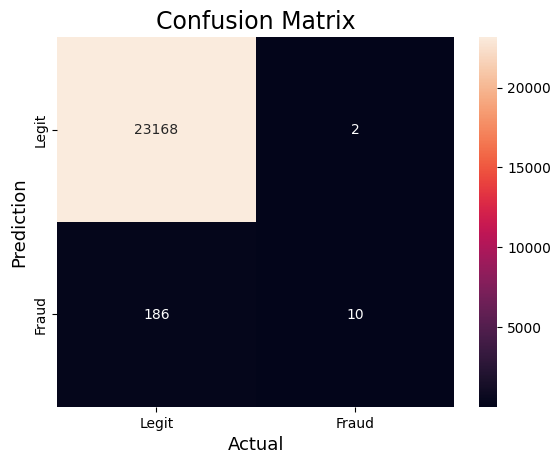

In [ ]:
from sklearn import metrics
cmat=metrics.confusion_matrix(knny_train,knnpred)
sns.heatmap(cmat,annot=True,fmt='g',xticklabels=['Legit','Fraud'],yticklabels=['Legit','Fraud'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
#testing usind fraudTest.csv
knnx_test = normalized_test.drop('is_fraud', axis=1)
knny_test = normalized_test['is_fraud']
knntest_pred = model.predict(knnx_test)
print('Classification Report:')
print(classification_report(knny_test,knntest_pred))
knntest_accuracy = accuracy_score(knny_test,knntest_pred)
print('Test Accuracy:', knntest_accuracy)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34864
           1       0.04      0.01      0.01       143

    accuracy                           1.00     35007
   macro avg       0.52      0.50      0.50     35007
weighted avg       0.99      1.00      0.99     35007

Test Accuracy: 0.99517239409261


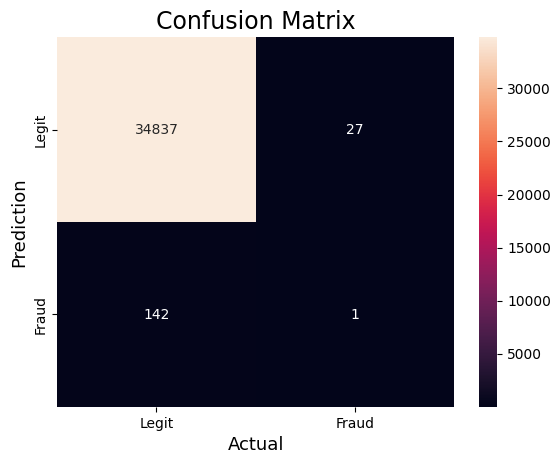

In [ ]:
cmat=metrics.confusion_matrix(knny_test,knntest_pred)
sns.heatmap(cmat,annot=True,fmt='g',xticklabels=['Legit','Fraud'],yticklabels=['Legit','Fraud'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

**MODEL USING DECISION TREE**

In [ ]:
dnX = normalized_data.drop("is_fraud", axis=1)
dny = normalized_data["is_fraud"]

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_classifier = DecisionTreeClassifier(random_state=42)


grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(dnX, dny)


print("Best Hyperparameters:")
print(grid_search.best_params_)

print("Best Accuracy on Training Data:", grid_search.best_score_)

best_classifier = grid_search.best_estimator_


dny_pred = best_classifier.predict(dnX)


print("Classification Report:")
print(classification_report(dny, dny_pred))

Best Hyperparameters:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Accuracy on Training Data: 0.9924657534246576
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34687
           1       0.88      0.54      0.67       353

    accuracy                           0.99     35040
   macro avg       0.94      0.77      0.83     35040
weighted avg       0.99      0.99      0.99     35040



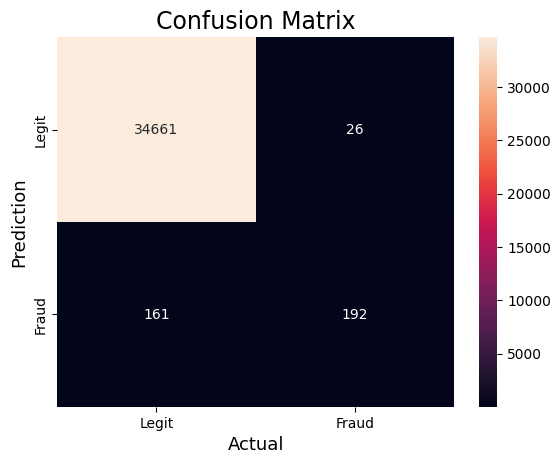

In [ ]:
from sklearn import metrics
cmat=metrics.confusion_matrix(dny, dny_pred)
sns.heatmap(cmat,annot=True,fmt='g',xticklabels=['Legit','Fraud'],yticklabels=['Legit','Fraud'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
#testing usind fraudTest.csv
dnx_test = normalized_test.drop('is_fraud', axis=1)
dny_test = normalized_test['is_fraud']
dntest_pred = best_classifier.predict(dnx_test)
print('Classification Report:')
print(classification_report(dny_test,dntest_pred))
dntest_accuracy = accuracy_score(dny_test,dntest_pred)
print("Accuracy on Test Data:", dntest_accuracy)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     58108
           1       0.04      0.25      0.08       234

    accuracy                           0.98     58342
   macro avg       0.52      0.62      0.53     58342
weighted avg       0.99      0.98      0.98     58342

Accuracy on Test Data: 0.9753865140036337


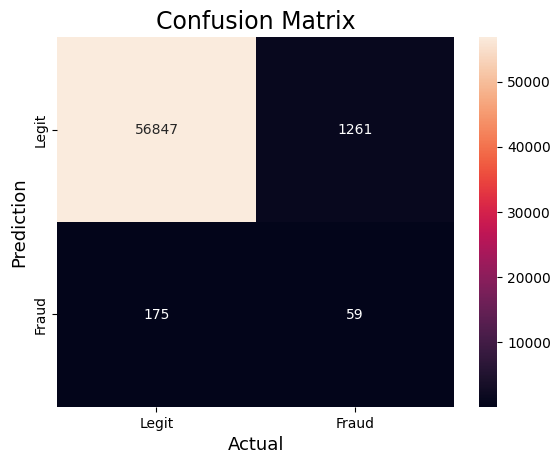

In [ ]:
from sklearn import metrics
cmat=metrics.confusion_matrix(dny_test,dntest_pred)
sns.heatmap(cmat,annot=True,fmt='g',xticklabels=['Legit','Fraud'],yticklabels=['Legit','Fraud'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

**MODEL USING NAIVE BAYES CLASSIFIER**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nbx_train = normalized_data.drop("is_fraud", axis=1)
nby_train = normalized_data["is_fraud"]
clf = GaussianNB()
clf=clf.fit(nbx_train,nby_train)
nby_pred=clf.predict(nbx_train)
print("Classification Report:")
print(classification_report(nby_train, nby_pred))
nbtrain_accuracy = accuracy_score(nby_train, nby_pred)
print("Accuracy on Test Data:", nbtrain_accuracy)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     34687
           1       0.43      0.11      0.18       353

    accuracy                           0.99     35040
   macro avg       0.71      0.56      0.59     35040
weighted avg       0.99      0.99      0.99     35040

Accuracy on Test Data: 0.989554794520548


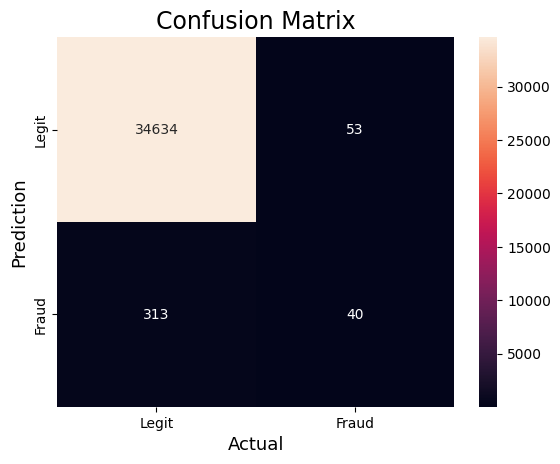

In [ ]:
from sklearn import metrics
cmat=metrics.confusion_matrix(nby_train, nby_pred)
sns.heatmap(cmat,annot=True,fmt='g',xticklabels=['Legit','Fraud'],yticklabels=['Legit','Fraud'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
#testing usind fraudTest.csv
nbx_test = normalized_test.drop('is_fraud', axis=1)
nby_test = normalized_test['is_fraud']
nbtest_pred = clf.predict(nbx_test)
print('Classification Report:')
print(classification_report(nby_test,nbtest_pred))
nbtest_accuracy = accuracy_score(nby_test,nbtest_pred)
print("Accuracy on Test Data:", nbtest_accuracy)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     58108
           1       0.05      0.27      0.09       234

    accuracy                           0.98     58342
   macro avg       0.53      0.63      0.54     58342
weighted avg       0.99      0.98      0.99     58342

Accuracy on Test Data: 0.9776318946899318


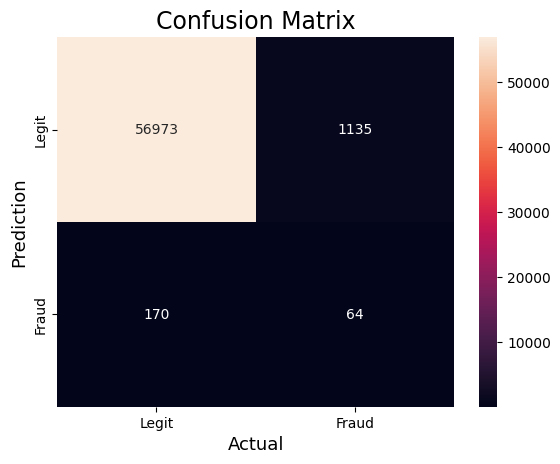

In [ ]:
from sklearn import metrics
cmat=metrics.confusion_matrix(nby_test, nbtest_pred)
sns.heatmap(cmat,annot=True,fmt='g',xticklabels=['Legit','Fraud'],yticklabels=['Legit','Fraud'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

**MODEL USING XGBOOST**

In [ ]:
xgX = normalized_data.drop("is_fraud", axis=1)
xgy = normalized_data["is_fraud"]
xgb_classifier = xgb.XGBClassifier(random_state=40)
xgb_classifier.fit(xgX, xgy)


cv_accuracy = cross_val_score(xgb_classifier, xgX, xgy, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", cv_accuracy.mean())


xgy_pred = xgb_classifier.predict(xgX)


xgaccuracy = accuracy_score(xgy, xgy_pred)
print("Overall Accuracy:", xgaccuracy)

print("Classification Report:")
print(classification_report(xgy, xgy_pred))

print("Confusion Matrix:")
print(confusion_matrix(xgy, xgy_pred))


Cross-Validation Accuracy: 0.9882990867579908
Overall Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34687
           1       1.00      1.00      1.00       353

    accuracy                           1.00     35040
   macro avg       1.00      1.00      1.00     35040
weighted avg       1.00      1.00      1.00     35040

Confusion Matrix:
[[34687     0]
 [    0   353]]


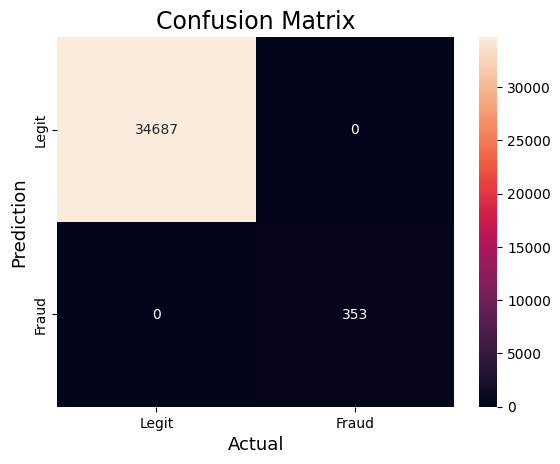

In [ ]:
from sklearn import metrics
cmat=metrics.confusion_matrix(xgy, xgy_pred)
sns.heatmap(cmat,annot=True,fmt='g',xticklabels=['Legit','Fraud'],yticklabels=['Legit','Fraud'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
xgX_test = normalized_test.drop("is_fraud", axis=1)
xgy_test = normalized_test["is_fraud"]


xgy_pred = xgb_classifier.predict(xgX_test)


xgtaccuracy = accuracy_score(xgy_test, xgy_pred)
print("Accuracy on Test Data:", xgtaccuracy)

print("Classification Report:")
print(classification_report(xgy_test, xgy_pred))

print("Confusion Matrix:")
print(confusion_matrix(xgy_test, xgy_pred))

Accuracy on Test Data: 0.9926639470707209
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58108
           1       0.01      0.00      0.00       234

    accuracy                           0.99     58342
   macro avg       0.50      0.50      0.50     58342
weighted avg       0.99      0.99      0.99     58342

Confusion Matrix:
[[57913   195]
 [  233     1]]


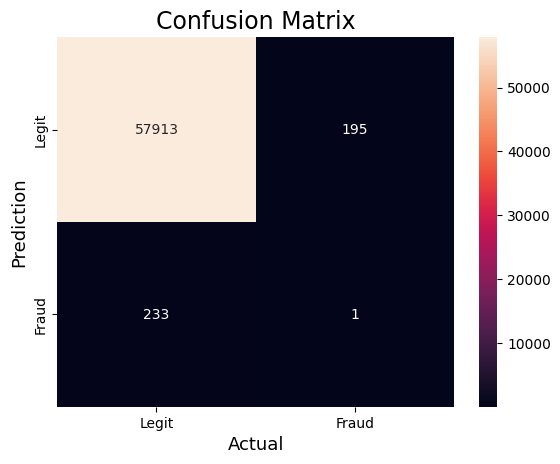

In [ ]:
from sklearn import metrics
cmat=metrics.confusion_matrix(xgy_test, xgy_pred)
sns.heatmap(cmat,annot=True,fmt='g',xticklabels=['Legit','Fraud'],yticklabels=['Legit','Fraud'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

**MODEL USING ADABOOST**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adX = normalized_data.drop("is_fraud", axis=1)
ady = normalized_data["is_fraud"]
adb_classifier = AdaBoostClassifier(random_state=40)
adb_classifier.fit(adX, ady)


adcv_accuracy = cross_val_score(adb_classifier, adX, ady, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", cv_accuracy.mean())


ady_pred = adb_classifier.predict(adX)


adaccuracy = accuracy_score(ady, ady_pred)
print("Overall Accuracy:", adaccuracy)

print("Classification Report:")
print(classification_report(ady, ady_pred))

print("Confusion Matrix:")
print(confusion_matrix(ady, ady_pred))

Cross-Validation Accuracy: 0.9882990867579908
Overall Accuracy: 0.9947773972602739
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34687
           1       0.85      0.59      0.69       353

    accuracy                           0.99     35040
   macro avg       0.92      0.79      0.85     35040
weighted avg       0.99      0.99      0.99     35040

Confusion Matrix:
[[34650    37]
 [  146   207]]


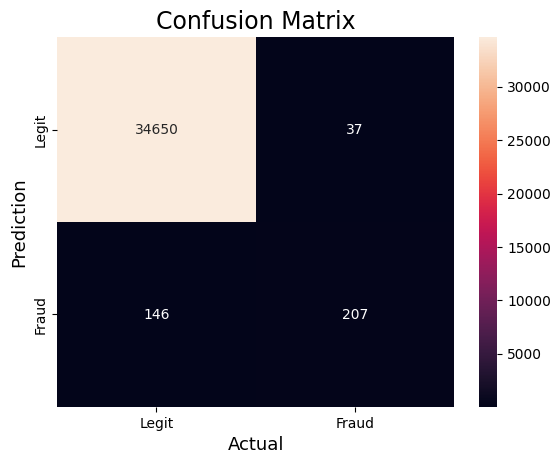

In [ ]:
from sklearn import metrics
cmat=metrics.confusion_matrix(ady, ady_pred)
sns.heatmap(cmat,annot=True,fmt='g',xticklabels=['Legit','Fraud'],yticklabels=['Legit','Fraud'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
adX_test = normalized_test.drop("is_fraud", axis=1)
ady_test = normalized_test["is_fraud"]


ady_pred = adb_classifier.predict(adX_test)


adtaccuracy = accuracy_score(ady_test, ady_pred)
print("Accuracy on Test Data:", adtaccuracy)

print("Classification Report:")
print(classification_report(ady_test, ady_pred))

print("Confusion Matrix:")
print(confusion_matrix(ady_test, ady_pred))

Accuracy on Test Data: 0.9910356175653903
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     58108
           1       0.02      0.03      0.03       234

    accuracy                           0.99     58342
   macro avg       0.51      0.51      0.51     58342
weighted avg       0.99      0.99      0.99     58342

Confusion Matrix:
[[57812   296]
 [  227     7]]


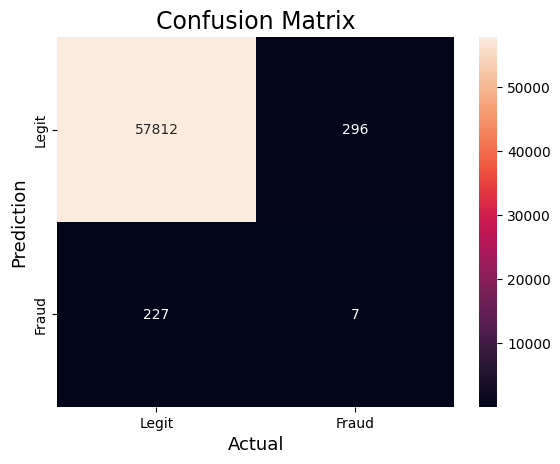

In [ ]:
from sklearn import metrics
cmat=metrics.confusion_matrix(ady_test, ady_pred)
sns.heatmap(cmat,annot=True,fmt='g',xticklabels=['Legit','Fraud'],yticklabels=['Legit','Fraud'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()